(1920, 1080, 3)


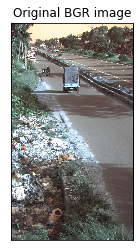

In [107]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the image
img = cv2.imread("1.jpg")
print(img.shape)
plt.title('Original BGR image')
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()
org_img=img

(1920, 1080, 3)


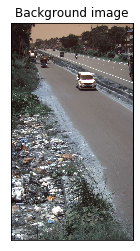

In [108]:
background= cv2.imread("back.jpg")
print(background.shape)
plt.title('Background image')
plt.imshow(background)
plt.xticks([]), plt.yticks([])
plt.show()

In [109]:
#cv2.imshow('original_img',img)
per=50
width= int( (img.shape[1]*per) / 100)
height= int ((img.shape[0]*per) /100 )
dim=(width, height)
img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
print(img.shape)
image=img
#cv2.imshow('Resized_img',img)
# Apply log transform
#c= 255/ (np.log(1+np.max(img)))


(960, 540, 3)


In [110]:
#cv2.imshow('original_img',img)
per1=50
width1= int( (background.shape[1]*per) / 100)
height1= int ((background.shape[0]*per) /100 )
dim1=(width1, height1)
background = cv2.resize(background,dim1, interpolation = cv2.INTER_AREA)
print(background.shape)

#cv2.imshow('Resized_img',img)
# Apply log transform
#c= 255/ (np.log(1+np.max(img)))


(960, 540, 3)


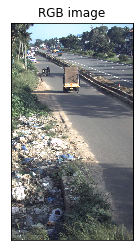

In [111]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('RGB image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
image=img

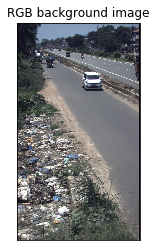

In [112]:
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
plt.title('RGB background image')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


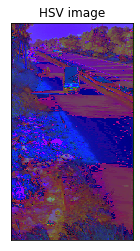

In [113]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.title('HSV image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

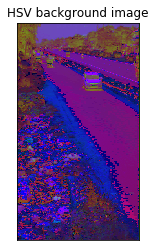

In [114]:
background= cv2.cvtColor(background, cv2.COLOR_RGB2HSV)
plt.title('HSV background image')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

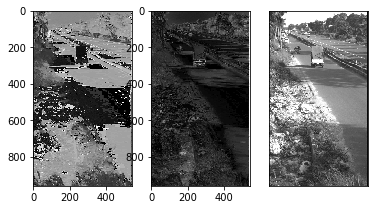

In [115]:
H, S, V = cv2.split(img)
plt.title('HSV components image')
plt.subplot(131)
plt.imshow(H, cmap='gray')
plt.subplot(132)
plt.imshow(S, cmap='gray')
plt.subplot(133)
plt.imshow(V, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

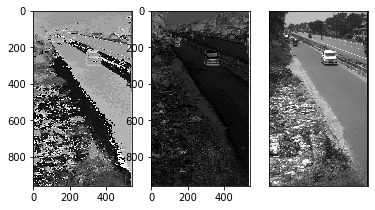

In [116]:
BH, BS, BV= cv2.split(background)
plt.title('HSV components background image')
plt.subplot(131)
plt.imshow(BH, cmap='gray')
plt.subplot(132)
plt.imshow(BS, cmap='gray')
plt.subplot(133)
plt.imshow(BV, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [117]:
alpha1 = 0.2 ; beta1 = 0.8 ; thetas= 1; thetah= 1
s=V
print(s.shape)


(960, 540)


In [118]:
import sys
V = np.float32(V)/255
BV= np.float32(BV)/255
S = np.float32(S)/255
BS= np.float32(BS)/255
H = np.float32(H)/255
BH= np.float32(BH)/255
s= V.copy()



In [119]:
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        try:
            x= V[i,j]/ BV[i,j]
        except ZeroDivisionError:
            x = 0
        
        if ( (alpha1 <= x <= beta1) and (abs(S[i,j]-BS[i,j])<= thetas) and (abs(H[i,j]-BH[i,j])<=thetah)) :
            s[i,j]=1
        else:
            s[i,j]=0
            
s=s*255

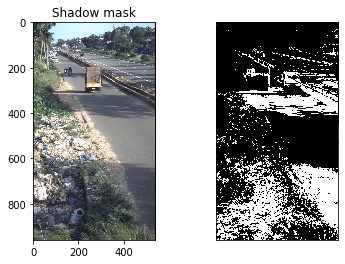

In [120]:
s = np.array(s,dtype=np.uint8)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Shadow mask')
plt.subplot(122)
plt.imshow(s, cmap= 'gray')


plt.xticks([]), plt.yticks([])
plt.show()

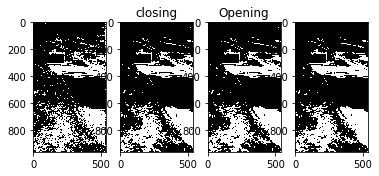

In [121]:


plt.subplot(141)
plt.imshow(s, cmap= 'gray')

median = cv2.medianBlur(s, 5)
plt.subplot(142)
plt.imshow(median, cmap = 'gray')
# Closing - Good for removing noise
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(median, cv2.MORPH_CLOSE, kernel)
plt.title('closing')
plt.subplot(143)
plt.imshow(closing, cmap = 'gray')


# Opening - Good for removing noise
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
plt.title('Opening')
plt.subplot(144)
plt.imshow(opening, cmap = 'gray')


(960, 540)
uint8
(960, 540, 3)
uint8
(960, 540, 3)


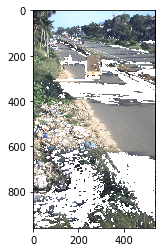

In [122]:
opening = np.array(opening,dtype=np.uint8)
print(opening.shape)
print(opening.dtype)
print(image.shape)
print(image.dtype)

result = image.copy()
height=result.shape[0]
width=result.shape[1]
blank_image = np.zeros((height,width,3), np.uint8)
print(blank_image.shape)
#result[opening!=0] = (0,0,0)

result[opening!=0] = (255,255,255)

plt.imshow(result, cmap = 'gray')
#plt.imshow(blank_image, cmap = 'gray')

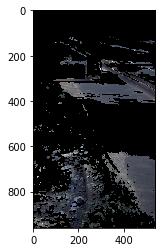

In [123]:
blank_image[opening!=0] = image[opening!=0]
plt.imshow(blank_image, cmap = 'gray')


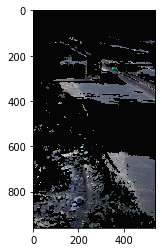

In [131]:
blank_image1=np.uint8(np.double(blank_image)*1.2 + 5)
plt.imshow(blank_image1, cmap = 'gray')


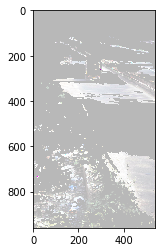

In [132]:
equ = np.zeros((height,width,3), np.uint8)
equ[opening==0]=image[opening==0]
equ[:,:,0] = cv2.equalizeHist(blank_image1[:,:,0])
equ[:,:,1] = cv2.equalizeHist(blank_image1[:,:,1])
equ[:,:,2] = cv2.equalizeHist(blank_image1[:,:,2])
plt.imshow(equ, cmap = 'gray')

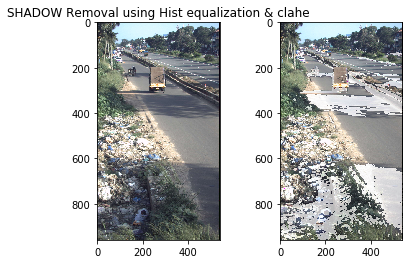

In [133]:
equ[opening==0]=image[opening==0]
plt.subplot(121)
plt.title('SHADOW Removal using Hist equalization & clahe')
plt.imshow(image, cmap = 'gray')
plt.subplot(122)
plt.imshow(equ, cmap = 'gray')


In [134]:
claheimg = np.zeros((height,width,3), np.uint8)
claheimg[opening==0]=image[opening==0]
clahe = cv2.createCLAHE(clipLimit=9.0,tileGridSize=(5, 5))

claheimg[:,:,0] = clahe.apply(blank_image1[:,:,0])
claheimg[:,:,1] = clahe.apply(blank_image1[:,:,1])
claheimg[:,:,2] = clahe.apply(blank_image1[:,:,2])


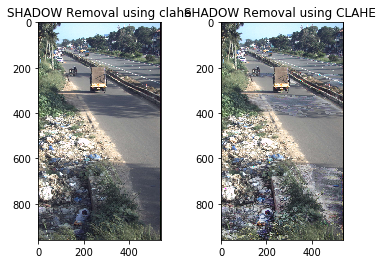

In [135]:
claheimg[opening==0]=image[opening==0]

plt.subplot(121)
plt.title('SHADOW Removal using clahe')
plt.imshow(image, cmap = 'gray')
plt.subplot(122)
plt.title('SHADOW Removal using CLAHE ')
plt.imshow(claheimg, cmap = 'gray')

In [140]:
import os
path1 = "/home/user/Downloads/DAY2/SET7"    
listing = os.listdir(path1)    
for file in listing:
    print(file)
print(len(listing))

img2597950ANPR_L00.jpg
img2597952ANPR_L00.jpg
img2597891ANPR_L00.jpg
img2597951ANPR_L00.jpg
img2597863ANPR_L00.jpg
img2597849ANPR_L00.jpg
img2597841ANPR_L00.jpg
img2597897ANPR_L00.jpg
img2597932ANPR_L00.jpg
img2597818ANPR_L00.jpg
img2597866ANPR_L00.jpg
img2597824ANPR_L00.jpg
img2597829ANPR_L00.jpg
img2597959ANPR_L00.jpg
img2597955ANPR_L00.jpg
img2597819ANPR_L00.jpg
img2597880ANPR_L00.jpg
img2597873ANPR_L00.jpg
img2597928ANPR_L00.jpg
img2597961ANPR_L00.jpg
img2597943ANPR_L00.jpg
img2597895ANPR_L00.jpg
img2597867ANPR_L00.jpg
img2597815ANPR_L00.jpg
img2597935ANPR_L00.jpg
img2597942ANPR_L00.jpg
img2597962ANPR_L00.jpg
img2597858ANPR_L00.jpg
img2597965ANPR_L00.jpg
img2597912ANPR_L00.jpg
img2597970ANPR_L00.jpg
img2597908ANPR_L00.jpg
img2597944ANPR_L00.jpg
img2597953ANPR_L00.jpg
img2597901ANPR_L00.jpg
img2597933ANPR_L00.jpg
img2597898ANPR_L00.jpg
img2597948ANPR_L00.jpg
img2597885ANPR_L00.jpg
img2597874ANPR_L00.jpg
img2597830ANPR_L00.jpg
img2597837ANPR_L00.jpg
img2597969ANPR_L00.jpg
img2597903A